**Proyecto para Platzi**

**Nombre alumno: Carlos Heli Chica**

**Asignatura: Curso de Visualización de Datos con Matplotlib y Seaborn**

**Fecha: Junio / 2024**

In [338]:
# Cargamos las librerias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import warnings
import os
import re
warnings.filterwarnings('ignore')

### Nombre Proyecto: Taxis

Obtenemos la base de datos de seaborn y se llama taxis. Este data set corresponde a una muestra tomada de los servicios de transportes en taxi realizados en New York. Las características del data set son las siguientes:

|Características | Descripción|
|----------------|------------|
|pickup|Fecha y Hora de Inicio (Recoger el pasajero)|
|dropoff|Fecha y Hora de Llegada (Dejar el pasajero)|
|passengers|Cantidad de Pasajeros|
|distance|Distancia del recorrido|
|fare|Tarifa marcada por el vehículo|
|tip|Propina recibida|
|tolls|Peajes pagados|
|total|Total Cobrado|
|color|Color de Taxi|
|payment|Mecanismo de pago|
|pickup zone|Zona de recogida|
|dropoff zone|Zona de entrega|
|pickup borough|Ciudad de recogida|
|dropoff_borough|Ciudad de entrega|

In [339]:
# Obtenemos el dataset
taxis = sns.load_dataset('taxis')
# Cuantificamos las filas y columnas del dataset
print("Filas: ",taxis.shape[0])
print("Columnas: ",taxis.shape[1])

Filas:  6433
Columnas:  14


In [340]:
# Evaluamos las característica del dataset
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [341]:
# Vemos el contenido del dataset
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [342]:
# Validamos desde que fecha se recogio la información para el dataset
print("Fecha de inicio de la muestra de transporte de taxis: ",taxis['pickup'].min())

Fecha de inicio de la muestra de transporte de taxis:  2019-02-28 23:29:03


In [343]:
print("Fecha de la última muestra de transporte de taxis: ",taxis['pickup'].max())

Fecha de la última muestra de transporte de taxis:  2019-03-31 23:43:45


In [344]:
# Vamos a identificar los valores nulos en el dataset
taxis.isnull().sum(axis=0)

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Se observa que la característica "payment", "pickup_zone", "dropoff_zone", "pickup_borough", "dropoff_borough" tienen registros con datos nulos, consideramos que la cuantía de estos registros son muy pocos y vamos a proceder eliminarlos.

In [345]:
# Vamos a eliminar los registros
taxis = taxis.dropna()
# Validamos que no existan mas valores nulos
taxis.isnull().sum(axis=0)

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Se eliminaron 92 registros, el 1.43% del dataset original. Como mencionamos antes esa cantidad no incide en el análisis.

Para el análisis vamos a agregar otras características a nuestro dataset.

- El tiempo transcurrido en cada recorrido

- Tipo de Carrera (corta menos de 15 minutos, media de 15 a 30 minutos y larga más de 30 minutos)

- Tiempo realizado: Mañana: de 6am a 12pm, Tarde: de 12pm a 7pm ,Noche: de 7pm a 6am

In [346]:
# Creamos una función para clasificar el periodo día en se realizó el servicio
def classify_day(hour):
    if 6 <= hour < 12:
        return 'morning_hours'
    elif 12 <= hour < 19:
        return 'afternoon_hours'
    else:
        return 'hours_of_the_night'

In [347]:
# Obtener el mes del servicio
taxis['month'] = taxis['pickup'].dt.month_name()

# Obtener el dia del servicio
taxis['day'] = taxis['pickup'].dt.day

# Obtener la hora en que comienza el servicio
taxis['pickup_time'] = taxis['pickup'].dt.time

# Calcular el tiempo transcurrido en cada recorrido en horas
taxis['time_elapsed'] = taxis['dropoff'] - taxis['pickup']

# Calcular el tiempo transcurrido en cada recorrido en minutos
taxis['time_elapsed_minutes'] = taxis['time_elapsed'].dt.total_seconds() / 60

# El nombre del día de la semana
taxis['pickup_weekday_name'] = taxis['pickup'].dt.day_name()

# Clasificar en tipos de servicios (Corto, medio y largo)
bins = [0, 15, 30, float('inf')]
labels = ['short', 'average', 'long']
taxis['trip_type'] = pd.cut(taxis['time_elapsed_minutes'], bins=bins, labels=labels, right=False)

# Aplicar la función para clasificar el periodo del día
taxis['hours_of_the_day'] = taxis['pickup'].dt.hour.apply(classify_day)

In [348]:
# Validamos que estan la nuevas características en el dataset
taxis.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_borough,dropoff_borough,month,day,pickup_time,time_elapsed,time_elapsed_minutes,pickup_weekday_name,trip_type,hours_of_the_day
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,...,Manhattan,Manhattan,March,23,20:21:09,0 days 00:06:15,6.250000,Saturday,short,hours_of_the_night
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,...,Manhattan,Manhattan,March,4,16:11:55,0 days 00:07:05,7.083333,Monday,short,afternoon_hours
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,...,Manhattan,Manhattan,March,27,17:53:01,0 days 00:07:24,7.400000,Wednesday,short,afternoon_hours


### Vamos a seleccionar las característica para realizar el proyecto de visualización

In [349]:
taxis = taxis[['month', 'day', 'pickup_time', 'passengers', 'distance', 'fare', 'tip', 'tolls', 'total', 'color', 'payment',
               'pickup_zone', 'dropoff_zone', 'pickup_borough', 'dropoff_borough', 'time_elapsed_minutes', 'pickup_weekday_name', 'trip_type', 'hours_of_the_day']]

El objetivo del proyecto es mostrar visualizaciones de datos que nos permitan evaluar el dataset.

In [350]:
# Validamos que sean las características en el dataset
taxis.head(3)

,month,day,pickup_time,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,time_elapsed_minutes,pickup_weekday_name,trip_type,hours_of_the_day
0,March,23,20:21:09,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,6.250000,Saturday,short,hours_of_the_night
1,March,4,16:11:55,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,7.083333,Monday,short,afternoon_hours
2,March,27,17:53:01,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,7.400000,Wednesday,short,afternoon_hours


#### 1. Como es el comportamiento del servicio de taxis en la zonas y en la horas del día.

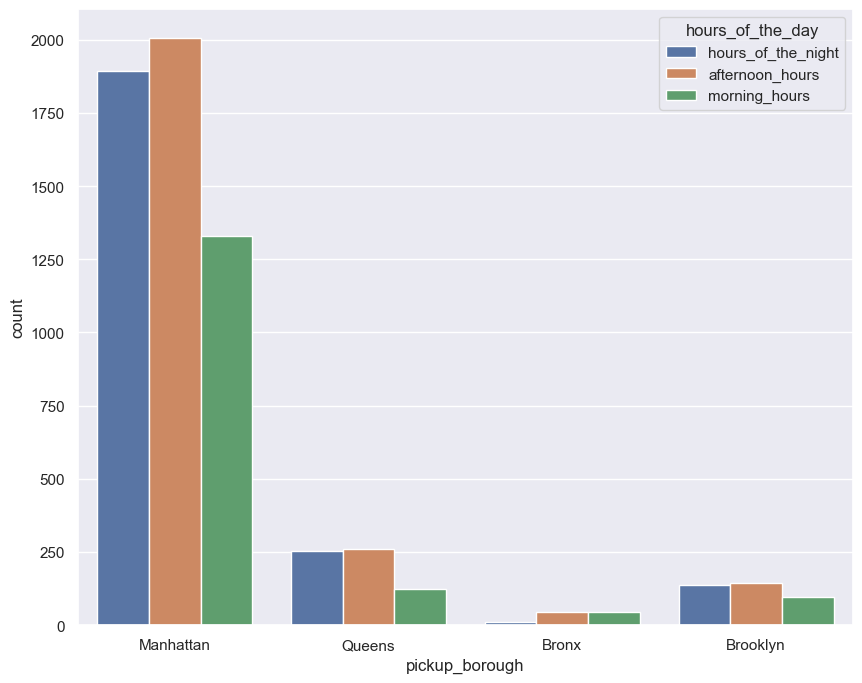

In [351]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = taxis, x='pickup_borough', hue='hours_of_the_day')
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_1.png', dpi=fig.dpi)

### 2. De acuerdo el tiempo del trayecto como es la forma de pago

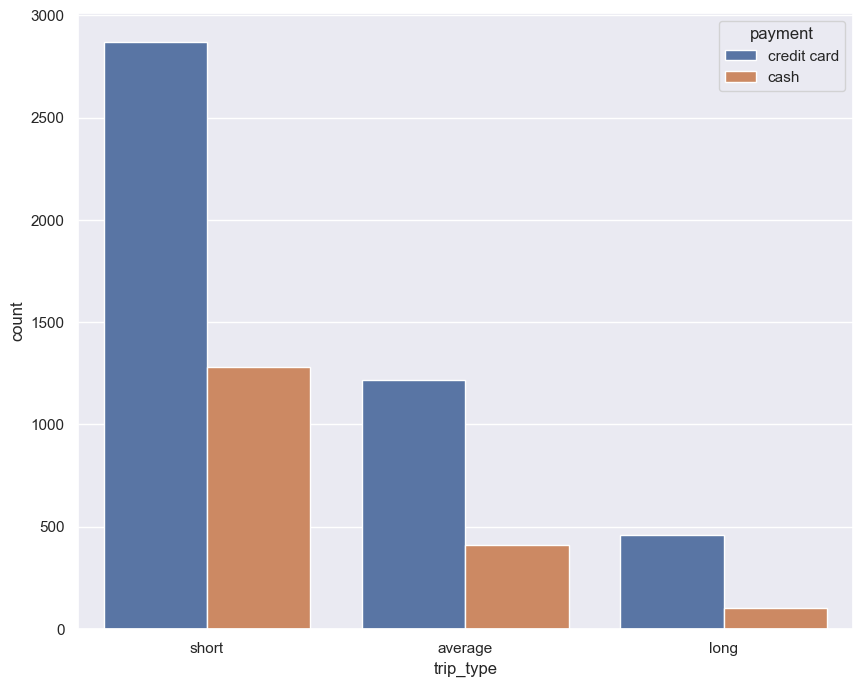

In [352]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = taxis, x='trip_type', hue='payment');
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_2.png', dpi=fig.dpi)

### 3. Como es el comportamiento en la semana el servicio de taxi y también de acuerdo a la zona

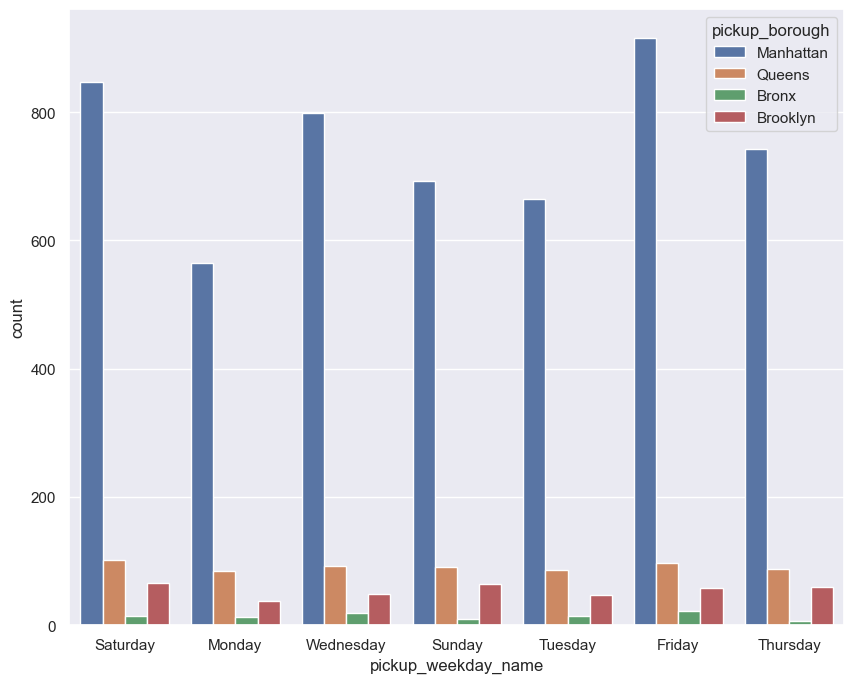

In [353]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = taxis, x='pickup_weekday_name', hue='pickup_borough')
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_3.png', dpi=fig.dpi)

### 4. De acuerdo con la zona cual color de vehículos es el que más se solicita

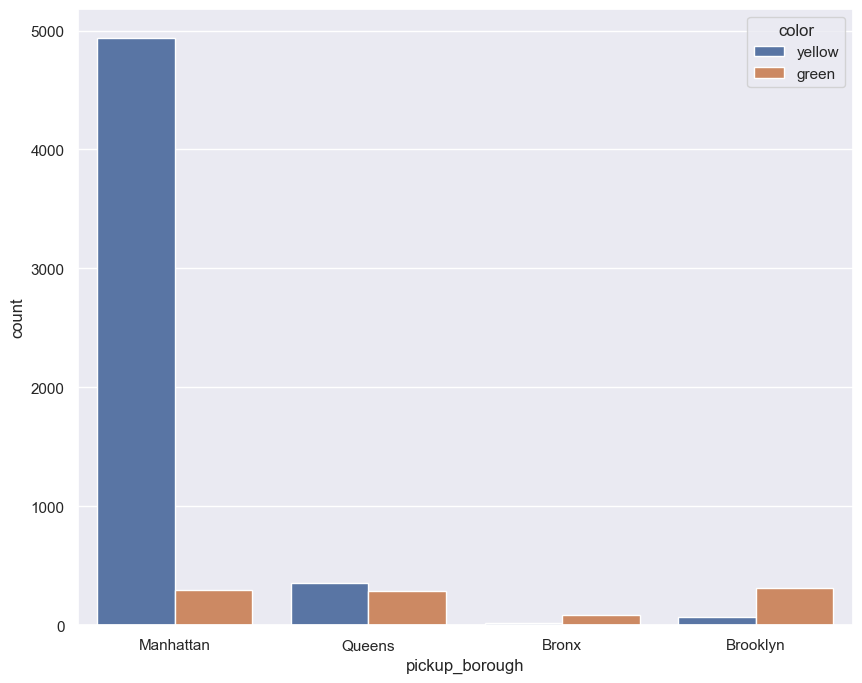

In [354]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = taxis, x='pickup_borough', hue='color')
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_4.png', dpi=fig.dpi)

### 5. De acuerdo con el tipo de trayecto cómo se comportan los pedidos durante el día

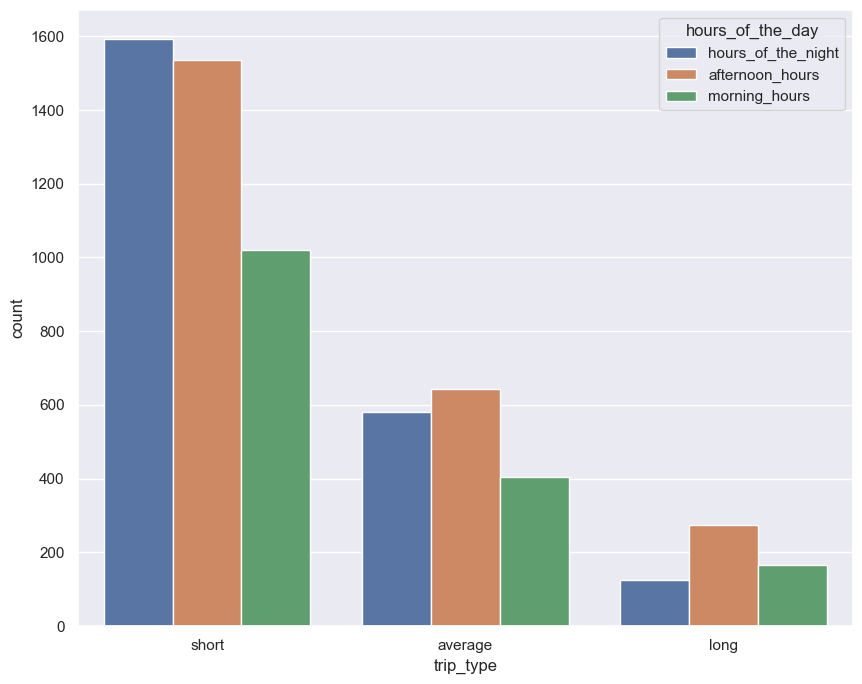

In [355]:
fig = plt.figure(figsize=(10,8))
sns.countplot(data = taxis, x='trip_type', hue='hours_of_the_day')
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_5.png', dpi=fig.dpi)

### 6. En cuales distancias (Trayectos) son donde más se cobra peaje

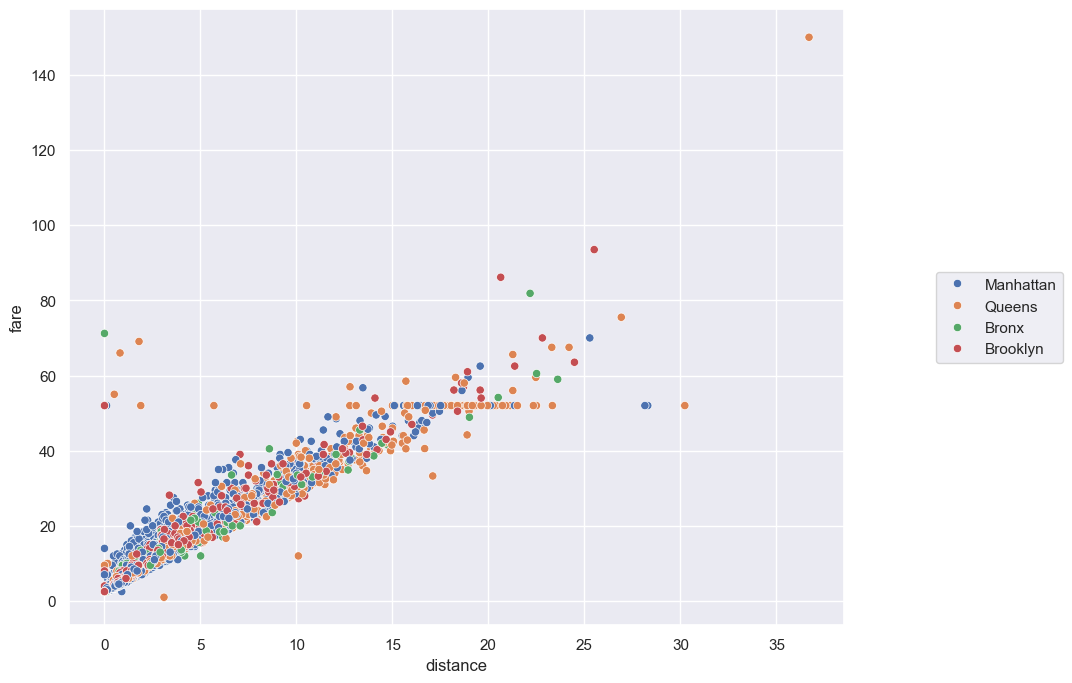

In [356]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=taxis, x='distance', y='fare', hue='pickup_borough')
plt.legend(loc='center', bbox_to_anchor=(1.2,0.5))
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_6.png', dpi=fig.dpi)

### 7. De acuerdo con la distancia y el cobro de servicio y en cada zona cuales son los cobros más bajos y altos

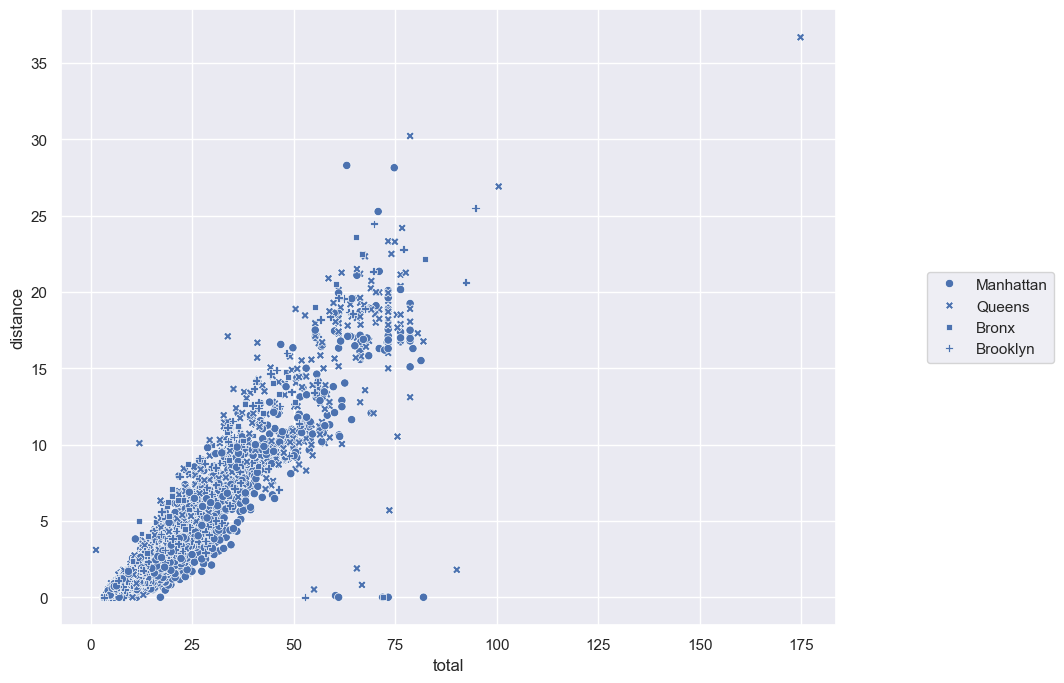

In [357]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data=taxis, x='total', y='distance', style='pickup_borough', palette = 'dark')
plt.legend(loc='center', bbox_to_anchor=(1.2,0.5))
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_7.png', dpi=fig.dpi)

### 8. De acuerdo con el tiempo del servicio y el cobro de servicio como es en cada zona  y cada día en la semana

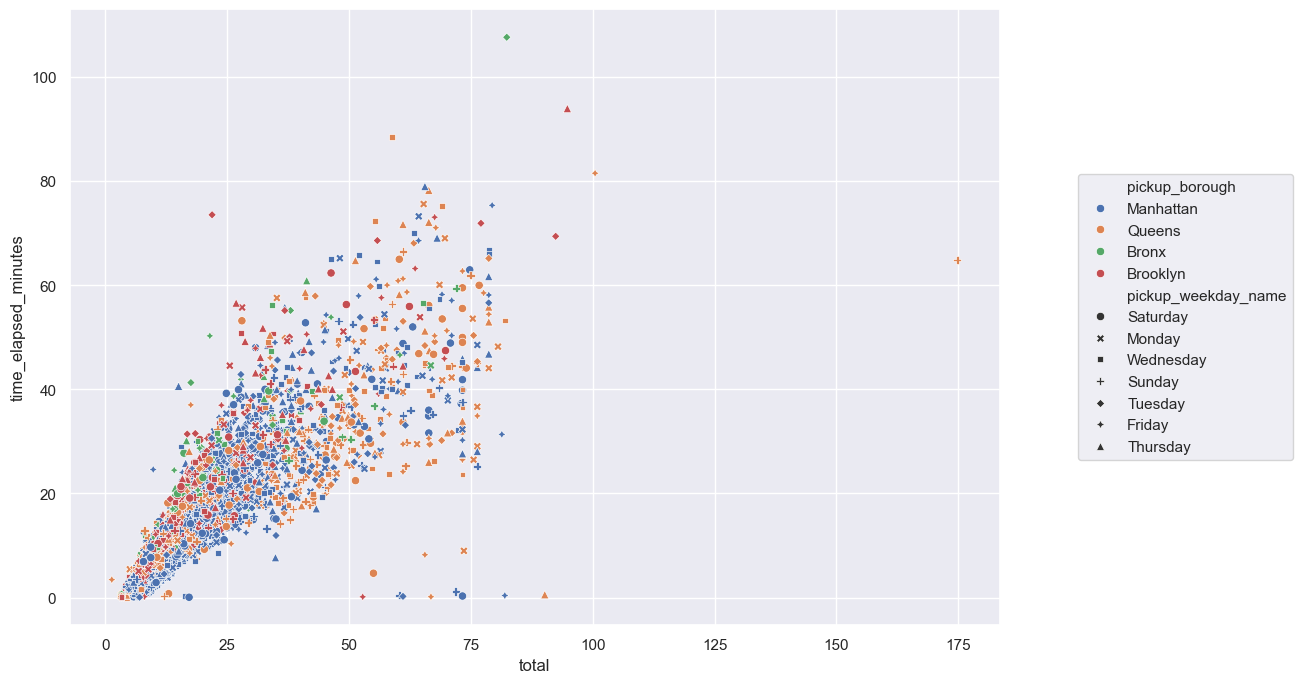

In [369]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data=taxis, x='total', y='time_elapsed_minutes', hue='pickup_borough',
                style='pickup_weekday_name')
plt.legend(loc='center', bbox_to_anchor=(1.2,0.5))
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_8.png', dpi=fig.dpi)

### 9. De acuerdo con el pago y distancia evaluar también el impacto en la zona y las horas del día en cada tipo de vehículo

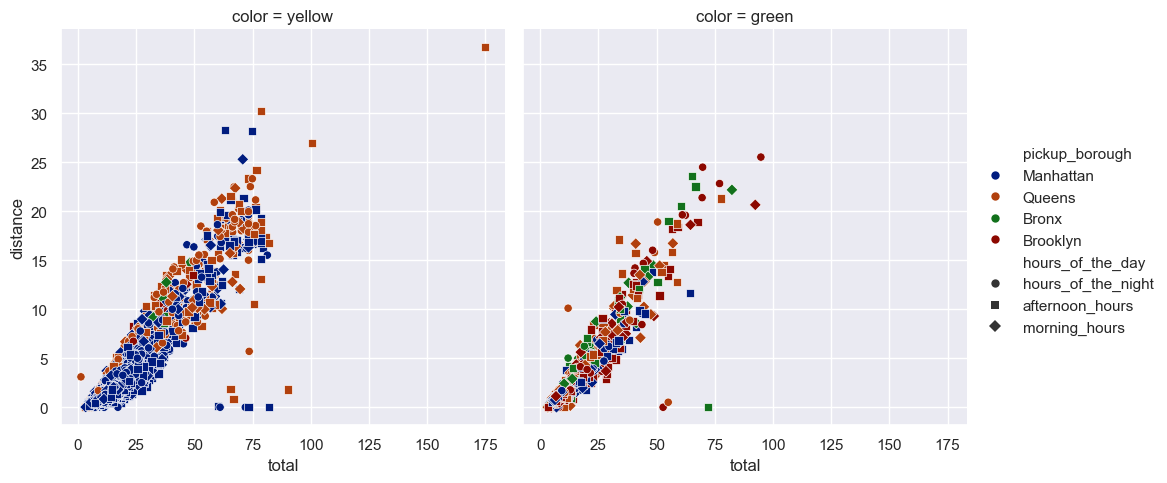

In [364]:
fig = sns.relplot(data=taxis, x='total', y='distance', hue='pickup_borough', style='hours_of_the_day',
            palette = 'dark', markers = markers, col='color')
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_9.png')

### 10. Para cada zona evaluar el comportamiento del pago y distancia en diferentes horas del día

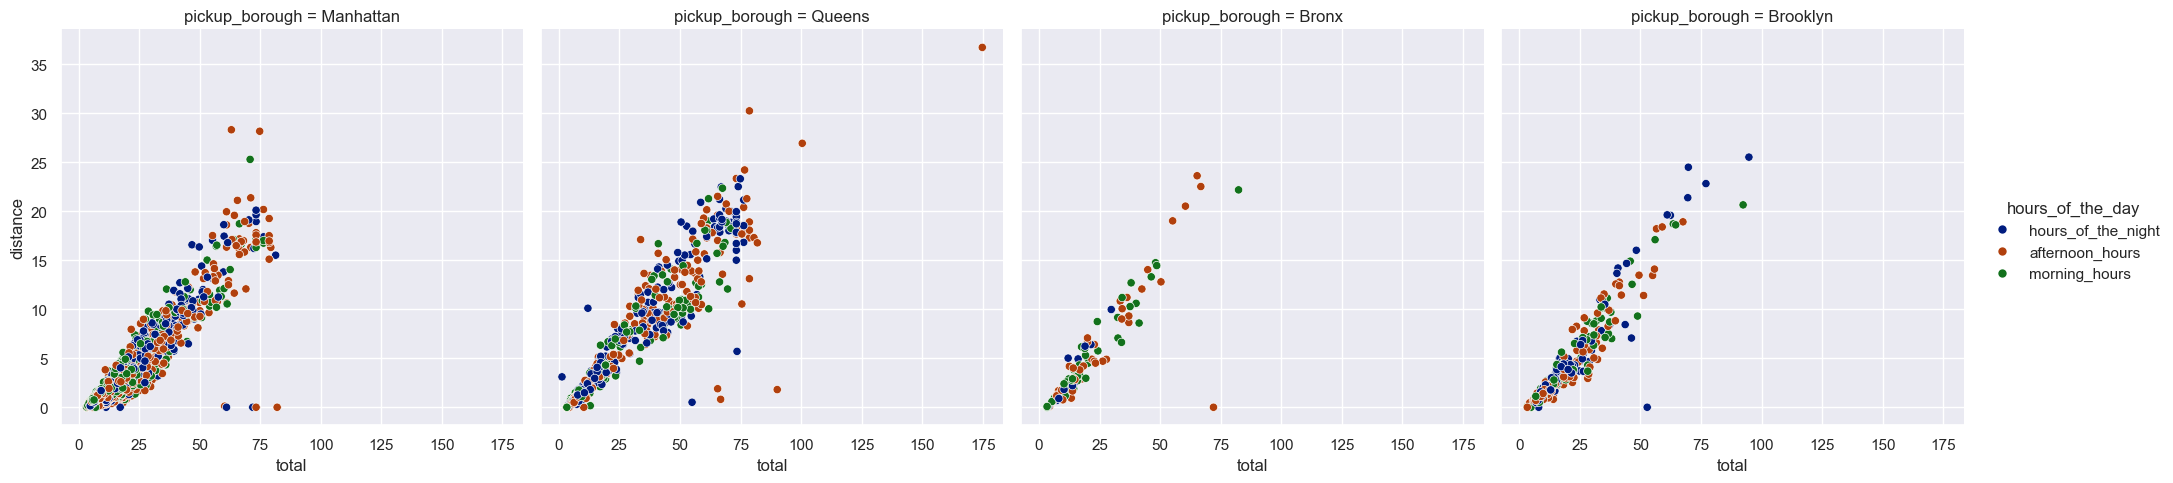

In [366]:
fig = sns.relplot(data=taxis, x='total', y='distance', hue='hours_of_the_day',
            palette = 'dark', markers = markers, col='pickup_borough')
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_10.png')

### 11.Evaluar cuales son las características con mayor correlación

In [ ]:
taxis_corr = taxis[['passengers', 'distance', 'fare', 'tip',
       'tolls', 'total', 'time_elapsed_minutes']].corr()

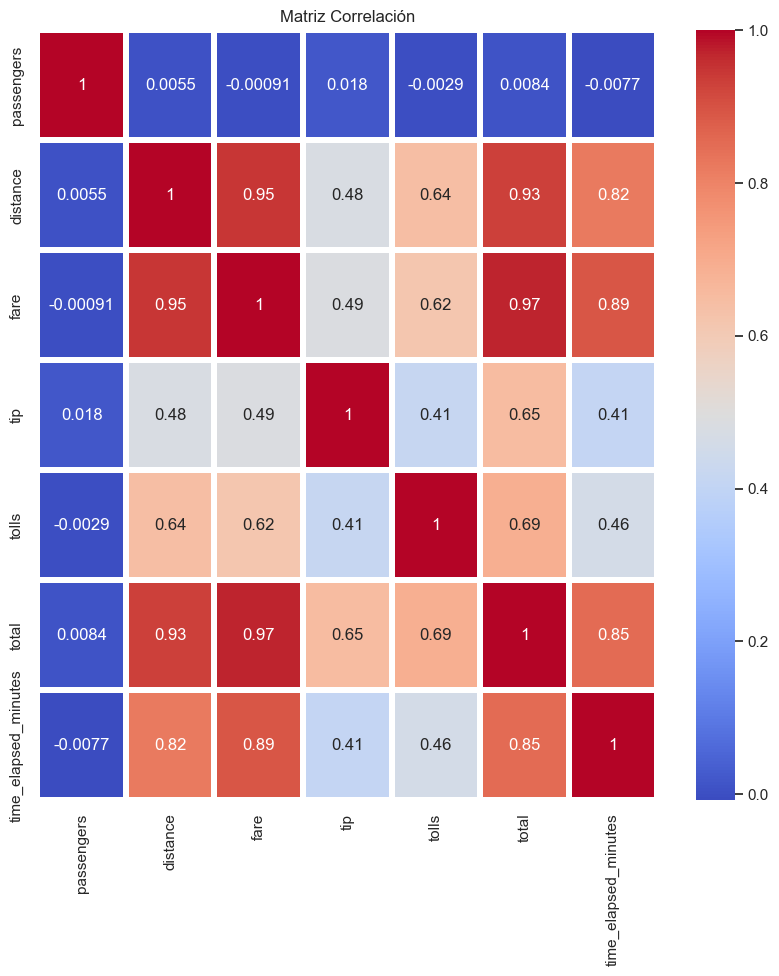

In [361]:
fig = plt.figure(figsize=(10,10))
plt.title("Matriz Correlación")
sns.heatmap(taxis_corr, annot=True, cmap='coolwarm', linewidths=3, cbar=True)
plt.show()
fig.savefig('Taxis_Carlos_Heli_Imagen_11.png', dpi=fig.dpi)